In [1]:
from sklearn import datasets
import numpy as np

---
### LADEN DER DATEN DIREKT AUS DER SKLEARN BIBLIOTHEK

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))

Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Klassenbezeichnungen als Zahlen:  [0 1 2]
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']


---
### AUFTEILEN DER DATEN IN TRAININGSDATEN UND TESTDATEN
Die Trainingsdaten werden autom. durch die train_test_split-Methode durchmischt, damit wir nicht nicht nur ein Blütenpaar im Trainingsdatenset haben.<br>
Mit random_state bestimmer wir immer die gleiche Trainings-Testdaten-Aufteilung in Verhältnis von 70% Trainingsdaten und 30% Testdaten (test_size=.3).<br><br>
Die integrierte straitify-Methode von train_test_split stellt sicher, dass wir auch eine genaue Repräsentation der Trainings- und Testdaten bekommen, wie sie <br>
auch im Datensatz vorliegt --> das testen wir entsprechend über die bincount-Funktion, ob das auch tatsächlich der Fall ist

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3, stratify=y)

In [13]:
print("Bezeichner in y: ",     np.bincount(y))
print("Bezeichner in train: ", np.bincount(y_train))
print("Bezeichner in test: ",  np.bincount(y_test))

Bezeichner in y:  [50 50 50]
Bezeichner in train:  [35 35 35]
Bezeichner in test:  [15 15 15]


---
### AUFGRUND VON GRADIENTENABSTIEGSVERFAHREN - MERKMALSSTANDARDISIERUNG

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

---
### WIR VERWENDEN DAS PERZEPTRON-MODEL 

In [16]:
from sklearn.linear_model import Perceptron
pnn = Perceptron(eta0=0.1, n_iter_no_change=40, random_state=1).fit(X_train_std, y_train)
y_pred = pnn.predict(X_test_std)
print("Fehlklassifizierte Exemplare: %d" % (y_test != y_pred).sum())

Fehlklassifizierte Exemplare: 2


#### ACCURACY BERECHNEN UND AUSGEBEN

In [24]:
from sklearn.metrics import accuracy_score
print("Klassifikationsrate: %.3f Prozent" % accuracy_score(y_test, y_pred))

Klassifikationsrate: 0.956 Prozent


In [27]:
# Alternativ dazu direkt über Klassifikatorklasse
print("Klassifikator: %.3f Prozent" % pnn.score(X_test_std, y_test))

Klassifikator: 0.956 Prozent


---
### AUSGABE DES ERGEBNISSES ALS CONTOURMAP
Die Daten werden in unserem Beispiel für alle drei Kategorien ausgegeben und visualisiert

In [43]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [69]:
def plot_decision_regions(X :np.array, y :np.array, classifier: Perceptron, test_idx=None, resolution=.005):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')


Index:  0
Index:  1
Index:  2


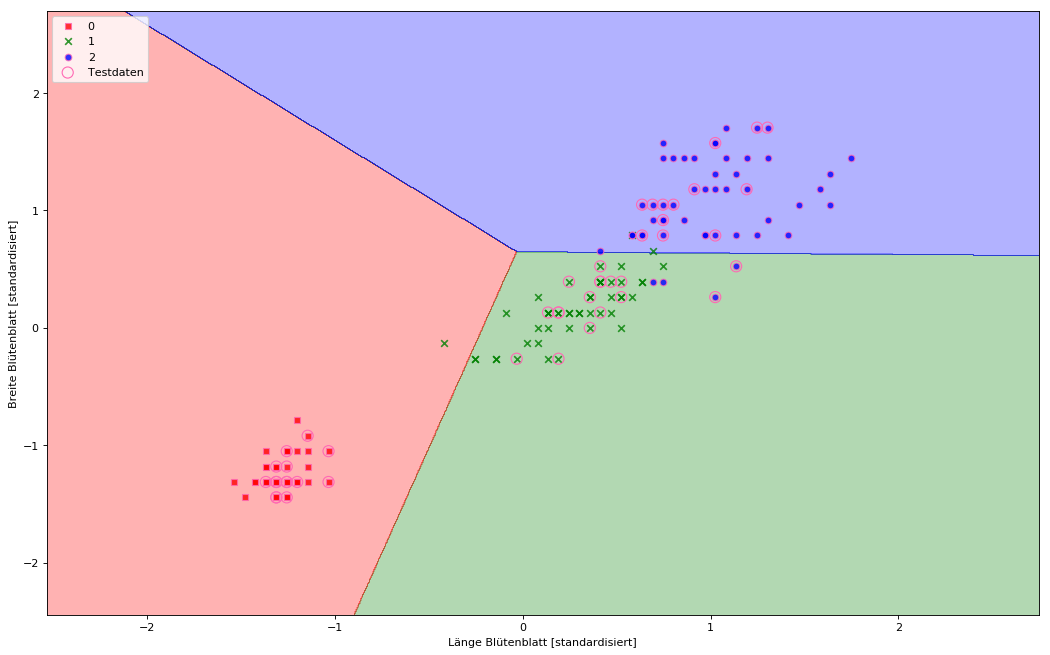

In [70]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

# Ergebnisse Plotten 
figure(figsize=(16, 10), dpi=80)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=pnn, test_idx=range(105,150))
plt.xlabel("Länge Blütenblatt [standardisiert]")
plt.ylabel("Breite Blütenblatt [standardisiert]")
plt.legend(loc="upper left")
plt.show()

Wie an obigem Graphen abzulesen ist, sind die Daten nicht zu 100% richtig erkannt worden - das zeigt auch der Accuracy_score, den wir berechnet haben